# Problem Statement:- Whether Health Insurance Claimed is Genuine or Fraud.
### By Binita K Mandal

## Step 1:- Importing required libraries

In [1]:
import numpy as np 
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.utils import resample
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.model_selection import StratifiedKFold 
from collections import Counter
from sklearn.utils import resample
from sklearn.metrics import f1_score

from joblib import dump, load

import warnings
warnings.filterwarnings('ignore')


pd.set_option('display.max_columns', 2000)
pd.set_option('display.max_rows', 500)

## Loading the dataset

In [2]:
data = pd.read_csv("Insurance Dataset.csv")

In [3]:
# Head of the dataset
data.head()

,Area_Service,Hospital County,Hospital Id,Age,Gender,Cultural_group,ethnicity,Days_spend_hsptl,Admission_type,"Home or self care,",ccs_diagnosis_code,ccs_procedure_code,apr_drg_description,Code_illness,Mortality risk,Surg_Description,Weight_baby,Abortion,Emergency dept_yes/No,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
0,Western NY,Allegany,37.0,30 to 49,F,White,Not Span/Hispanic,4,Elective,Home or Self Care,122,0,Other pneumonia,1,1.0,Medical,0,N,Y,5511.95,5582.49,1.012798,1,1
1,Western NY,Allegany,37.0,70 or Older,F,White,Not Span/Hispanic,4,Urgent,Short-term Hospital,197,0,Cellulitis & other skin infections,3,2.0,Medical,0,N,Y,4783.20,5162.82,1.079365,1,1
2,Western NY,Allegany,37.0,30 to 49,F,White,Not Span/Hispanic,3,Urgent,Home or Self Care,122,0,Other pneumonia,1,1.0,Medical,0,N,Y,3829.15,4056.52,1.059379,1,1
3,Western NY,Allegany,37.0,0 to 17,F,White,Not Span/Hispanic,1,Urgent,Home or Self Care,122,0,Other pneumonia,1,1.0,Medical,0,N,Y,1108.20,1644.75,1.484167,0,1
4,Western NY,Allegany,37.0,70 or Older,F,White,Not Span/Hispanic,3,Elective,Home or Self Care,122,0,Other pneumonia,2,3.0,Medical,0,N,Y,3418.18,3370.87,0.986161,1,1


In [4]:
# Tail of the dataset
data.tail()

,Area_Service,Hospital County,Hospital Id,Age,Gender,Cultural_group,ethnicity,Days_spend_hsptl,Admission_type,"Home or self care,",ccs_diagnosis_code,ccs_procedure_code,apr_drg_description,Code_illness,Mortality risk,Surg_Description,Weight_baby,Abortion,Emergency dept_yes/No,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
1048570,New York City,Bronx,1169.0,70 or Older,F,Other Race,Spanish/Hispanic,6,Emergency,Skilled Nursing Home,106,29,Cardiac arrhythmia & conduction disorders,2,3.0,Medical,0,N,Y,69650.41,13896.82,0.199522,1,3
1048571,New York City,Bronx,1169.0,0 to 17,F,Other Race,Not Span/Hispanic,2,Emergency,Home or Self Care,8,231,Other infectious & parasitic diseases,2,1.0,Medical,0,N,N,13587.38,3918.35,0.288382,1,3
1048572,New York City,Bronx,1169.0,50 to 69,M,Other Race,Spanish/Hispanic,13,Emergency,Medicare Cert Long Term Care Hospital,151,88,Hepatic coma & other major acute liver disorders,4,4.0,Medical,0,N,Y,104629.78,24746.64,0.236516,0,3
1048573,New York City,Bronx,1169.0,30 to 49,F,Black/African American,Not Span/Hispanic,2,Emergency,Home or Self Care,143,86,"Inguinal, femoral & umbilical hernia procedures",1,1.0,Surgical,0,N,Y,27521.41,6766.04,0.245846,1,3
1048574,New York City,Bronx,1169.0,50 to 69,M,Other Race,Spanish/Hispanic,2,Emergency,Home or Self Care,106,0,Cardiac arrhythmia & conduction disorders,1,1.0,Medical,0,N,Y,24832.23,4974.66,0.200331,1,2


In [5]:
# Statistics of the dataset
data.describe()

,Hospital Id,ccs_diagnosis_code,ccs_procedure_code,Code_illness,Mortality risk,Weight_baby,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
count,1.046119e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048533e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,6.529400e+02,1.987936e+02,9.723249e+01,2.051806e+00,1.748955e+00,2.935512e+02,2.708697e+04,1.046399e+04,4.565822e-01,7.499769e-01,1.935755e+00
std,6.711577e+02,1.652839e+02,8.732697e+01,9.145785e-01,9.864236e-01,9.494631e+02,5.487428e+04,2.230366e+04,8.029246e-01,4.330263e-01,7.717916e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,3.100000e-01,1.000000e-01,3.312909e-02,0.000000e+00,1.000000e+00
25%,2.130000e+02,1.080000e+02,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,7.402500e+03,3.234570e+03,3.135802e-01,0.000000e+00,1.000000e+00
50%,6.300000e+02,1.590000e+02,9.000000e+01,2.000000e+00,1.000000e+00,0.000000e+00,1.458988e+04,5.928480e+03,4.091384e-01,1.000000e+00,2.000000e+00
75%,9.770000e+02,2.180000e+02,1.740000e+02,3.000000e+00,3.000000e+00,0.000000e+00,2.914547e+04,1.134317e+04,5.192548e-01,1.000000e+00,3.000000e+00
max,9.250000e+03,6.700000e+02,2.310000e+02,4.000000e+00,4.000000e+00,9.000000e+03,6.196974e+06,2.562478e+06,1.575596e+02,1.000000e+00,5.000000e+00


In [6]:
#Information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 24 columns):
 #   Column                                 Non-Null Count    Dtype  
---  ------                                 --------------    -----  
 0   Area_Service                           1046119 non-null  object 
 1   Hospital County                        1046119 non-null  object 
 2   Hospital Id                            1046119 non-null  float64
 3   Age                                    1048575 non-null  object 
 4   Gender                                 1048575 non-null  object 
 5   Cultural_group                         1048575 non-null  object 
 6   ethnicity                              1048575 non-null  object 
 7   Days_spend_hsptl                       1048575 non-null  object 
 8   Admission_type                         1048575 non-null  object 
 9   Home or self care,                     1048575 non-null  object 
 10  ccs_diagnosis_code                     104

In [7]:
# Display statistics in objects present in dataset
data.describe(include = np.object)

,Area_Service,Hospital County,Age,Gender,Cultural_group,ethnicity,Days_spend_hsptl,Admission_type,"Home or self care,",apr_drg_description,Surg_Description,Abortion,Emergency dept_yes/No
count,1046119,1046119,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575
unique,7,51,5,3,4,3,120,6,19,316,3,2,2
top,Hudson Valley,Erie,70 or Older,F,White,Not Span/Hispanic,2,Emergency,Home or Self Care,"Neonate birthwt >2499g, normal newborn or neon...",Medical,N,Y
freq,261074,129242,306017,593506,781658,910555,236538,608595,694841,80169,805729,1047110,589954


In [8]:
# Checking columns count values

for column in data.columns:
     print("\n" + column)
     print(data[column].value_counts()) 


Area_Service
Hudson Valley      261074
Western NY         180459
Central NY         171251
Capital/Adirond    170671
Finger Lakes       156186
New York City       74629
Southern Tier       31849
Name: Area_Service, dtype: int64

Hospital County
Erie           129242
Westchester    127008
Monroe         110592
Onondaga        81249
Bronx           74629
Albany          61764
Orange          39756
Rockland        35695
Oneida          34165
Dutchess        32277
Broome          29853
Schenectady     23245
Niagara         21075
Chemung         16735
Warren          15557
Rensselaer      13889
Ulster          13615
Otsego          13212
Chautauqua      12780
St Lawrence     12278
Ontario         12024
Jefferson       11943
Clinton          9923
Saratoga         8955
Steuben          8831
Putnam           7019
Tompkins         6992
Montgomery       6459
Columbia         6332
Oswego           6110
Franklin         5875
Cattaraugus      5793
Sullivan         5704
Cayuga           5685
Madiso

Neonate birthwt >2499g, normal newborn or neonate w other problem                            80169
Vaginal delivery                                                                             58084
Septicemia & disseminated infections                                                         32196
Cesarean delivery                                                                            30091
Heart failure                                                                                25331
Other pneumonia                                                                              24078
Chronic obstructive pulmonary disease                                                        22988
Knee joint replacement                                                                       18375
Cellulitis & other skin infections                                                           17591
Cardiac arrhythmia & conduction disorders                                                    17079
Bipolar di

0       953801
3400      7570
3300      7540
3200      7481
3500      6835
3100      6715
3600      6262
3000      6146
3700      5652
2900      4866
3800      4352
2800      4017
3900      3588
2700      2967
4000      2618
2600      2429
4100      1925
2500      1813
2400      1452
4200      1402
2300      1051
4300      1028
2200       882
4400       682
2100       644
2000       552
4500       441
1900       415
1800       334
1700       312
4600       280
1600       268
1500       216
1300       195
1400       173
4700       149
1000       143
1200       141
1100       139
900        137
4800       134
600        122
700        120
800        114
500        100
4900        75
400         71
5000        40
300         40
5100        29
200         29
5400        17
5200        16
5300        11
5600         8
100          7
5500         6
6000         4
5700         3
7000         3
5900         2
6100         2
5800         2
6400         1
9000         1
8500         1
8000      

In [9]:
# Renaming the columns

data =  data.rename(columns = {'Emergency dept_yes/No': 'Emergency_dept','Home or self care,':'Home_or_self_care',
                                               'Mortality risk':'Mortality_risk','Hospital County':'Hospital_County','Hospital Id':'Hospital_Id'})

# View shape of data
data.shape

(1048575, 24)

In [10]:
# Removing missing data
data.isnull().sum()

Area_Service                             2456
Hospital_County                          2456
Hospital_Id                              2456
Age                                         0
Gender                                      0
Cultural_group                              0
ethnicity                                   0
Days_spend_hsptl                            0
Admission_type                              0
Home_or_self_care                           0
ccs_diagnosis_code                          0
ccs_procedure_code                          0
apr_drg_description                         0
Code_illness                                0
Mortality_risk                             42
Surg_Description                            0
Weight_baby                                 0
Abortion                                    0
Emergency_dept                              0
Tot_charg                                   0
Tot_cost                                    0
ratio_of_total_costs_to_total_char

In [11]:
# Dropping  nan values

data = data.dropna(subset=['Hospital_Id','Mortality_risk','Area_Service','Hospital_County'],how = 'any')

In [12]:
#removing  duplicates

data.drop_duplicates(keep='first',inplace=True)

In [13]:
data.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
1048570    False
1048571    False
1048572    False
1048573    False
1048574    False
Length: 1041265, dtype: bool

In [14]:
#Encoding the categorical variables using label encoder
 
def MultiLabelEncoder(columnlist,dataframe):
    for i in columnlist:

        labelencoder_X = LabelEncoder()
        dataframe[i] = labelencoder_X.fit_transform(dataframe[i])

In [15]:
columnlist = ['Area_Service','Hospital_County','Age','Gender','Days_spend_hsptl','Admission_type','Home_or_self_care','Surg_Description',
              'Emergency_dept','Cultural_group','ethnicity','apr_drg_description','Abortion']
MultiLabelEncoder(columnlist,data)

## Step 3: Data Visualisation

### Data visualisation of columns with respect to target column

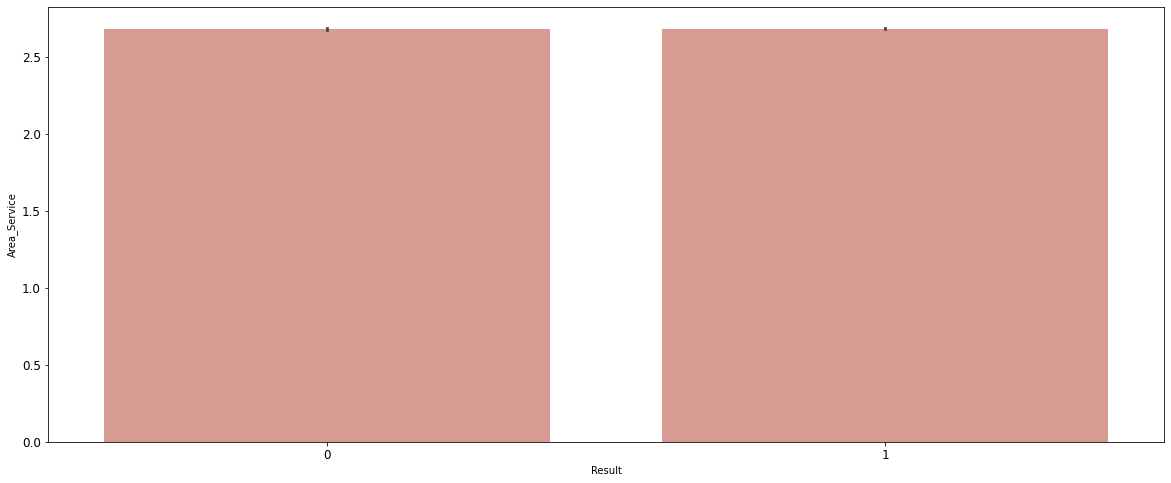

In [72]:
ax = sns.barplot(x="Result", y="Area_Service", data=data,

                 color="salmon", saturation=.5)

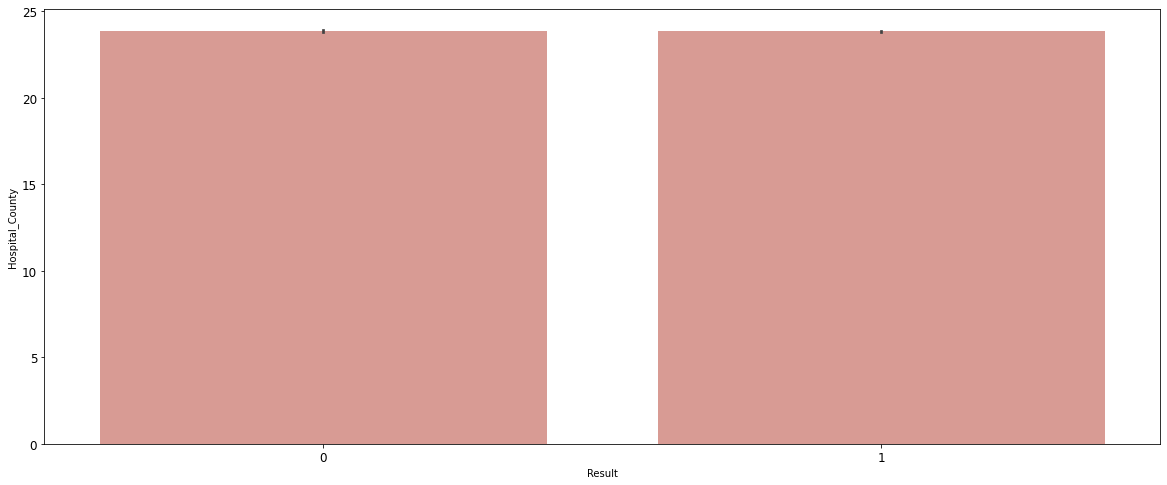

In [73]:
ax = sns.barplot(x="Result", y="Hospital_County", data=data,

                 color="salmon", saturation=.5)

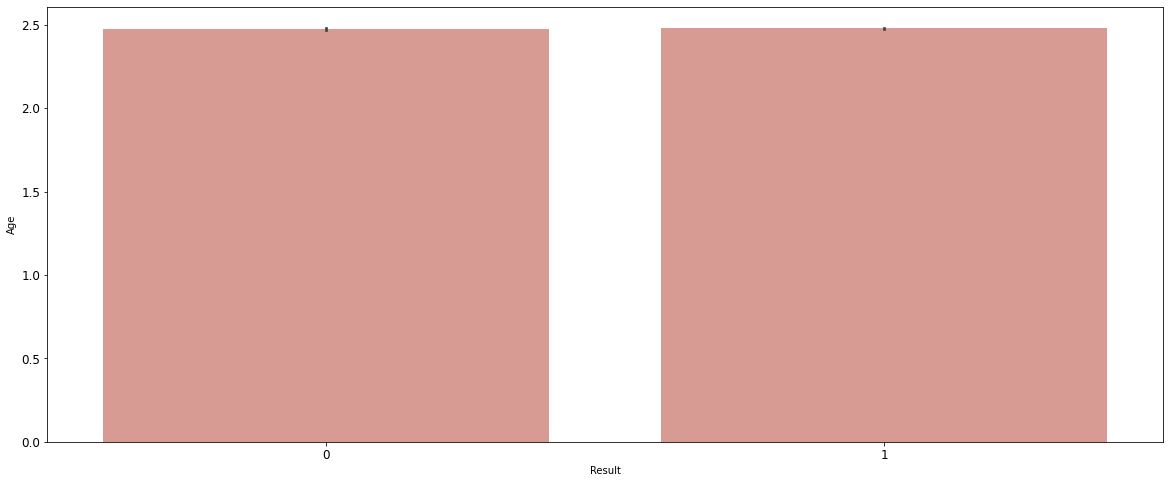

In [74]:
ax = sns.barplot(x="Result", y="Age", data=data,

                 color="salmon", saturation=.5)

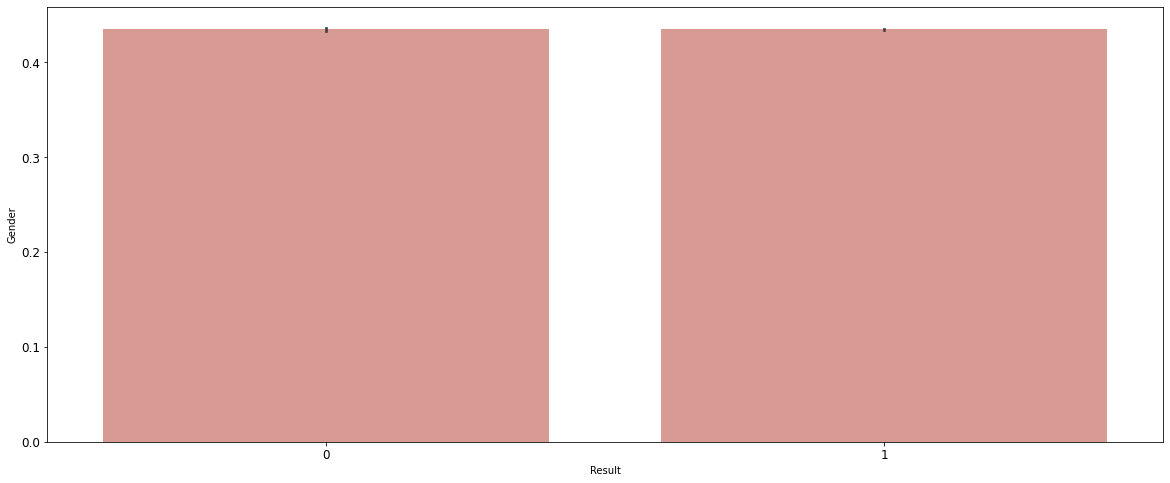

In [75]:
ax = sns.barplot(x="Result", y="Gender", data=data,

                 color="salmon", saturation=.5)

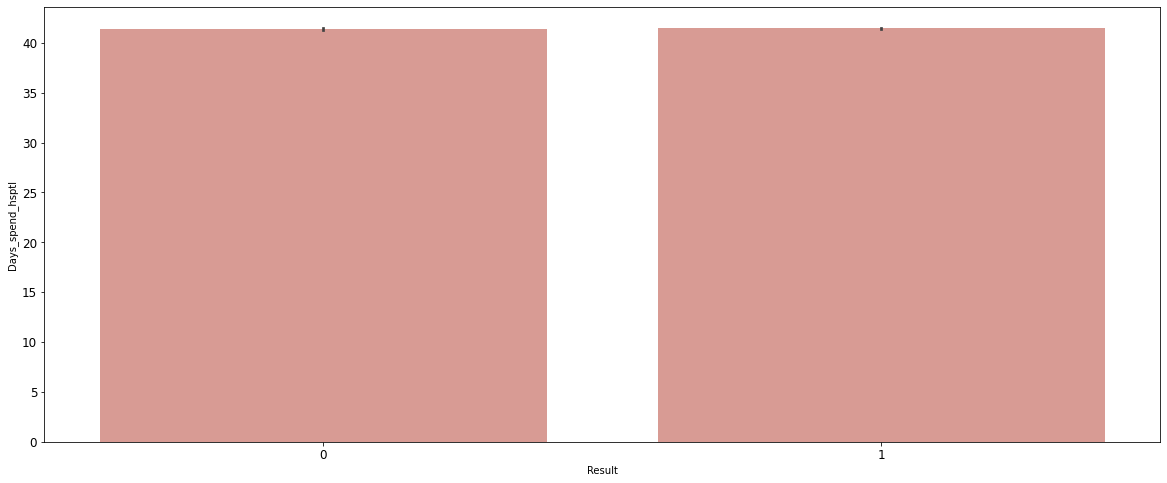

In [76]:
ax = sns.barplot(x="Result", y="Days_spend_hsptl", data=data,

                 color="salmon", saturation=.5)

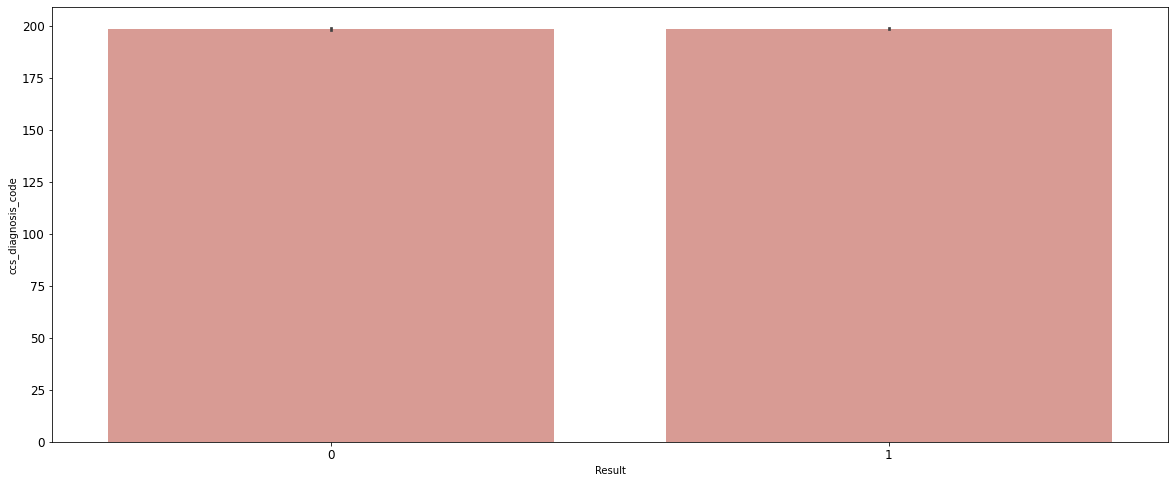

In [78]:
ax = sns.barplot(x="Result", y="ccs_diagnosis_code", data=data,

                 color="salmon", saturation=.5)

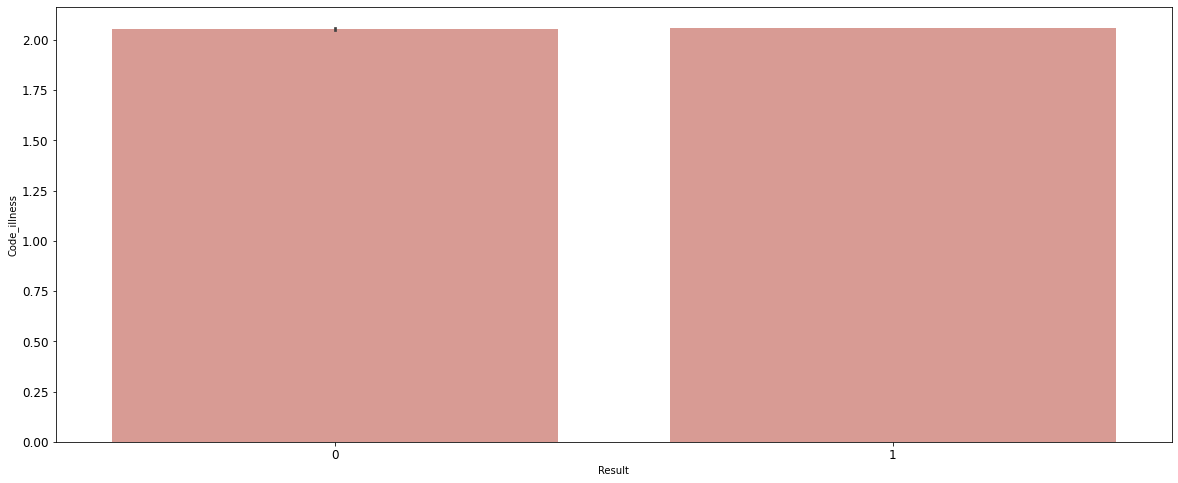

In [77]:
ax = sns.barplot(x="Result", y="Code_illness", data=data,

                 color="salmon", saturation=.5)

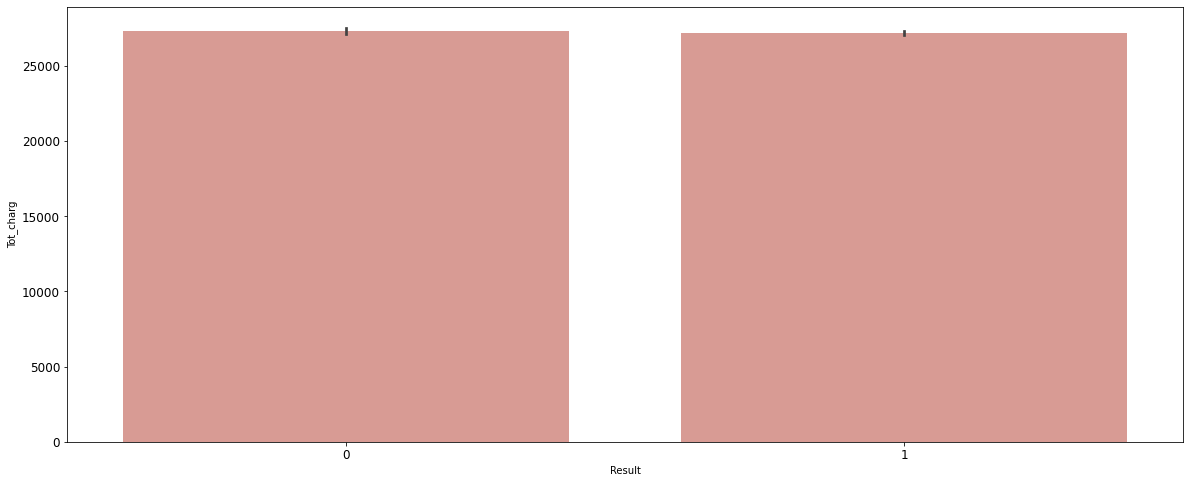

In [79]:
ax = sns.barplot(x="Result", y="Tot_charg", data=data,

                 color="salmon", saturation=.5)

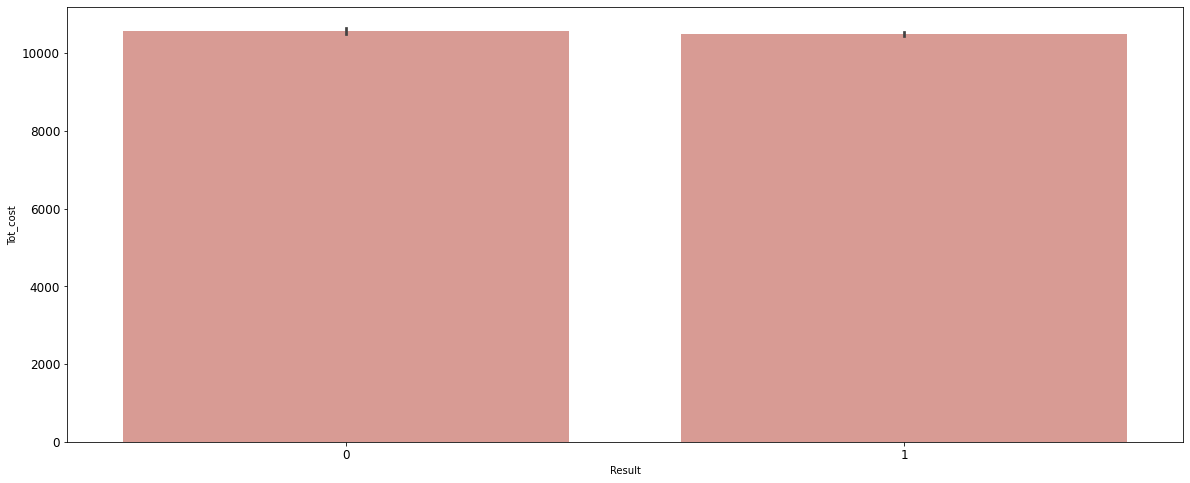

In [80]:
ax = sns.barplot(x="Result", y="Tot_cost", data=data,

                 color="salmon", saturation=.5)

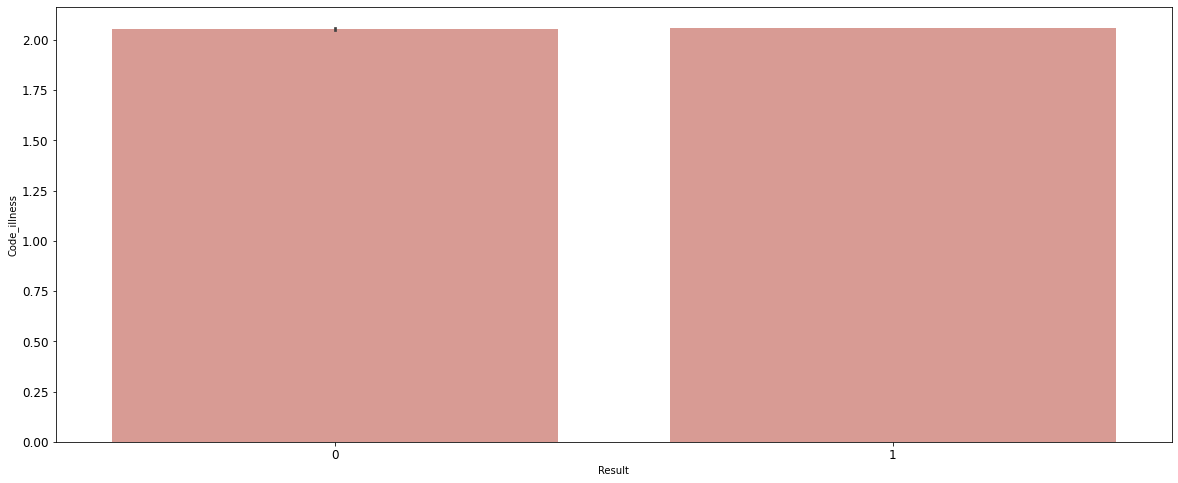

In [81]:
ax = sns.barplot(x="Result", y="Code_illness", data=data,

                 color="salmon", saturation=.5)

## Step 2:-  Feature Engineering

In [16]:
# Splitting data for further process

X = data.loc[:, data.columns != 'Result']
y = data.loc[: , 'Result'].values

In [17]:
print(X)

         Area_Service  Hospital_County  Hospital_Id  Age  Gender  \
0                   6                1         37.0    2       0   
1                   6                1         37.0    4       0   
2                   6                1         37.0    2       0   
3                   6                1         37.0    0       0   
4                   6                1         37.0    4       0   
...               ...              ...          ...  ...     ...   
1048570             4                2       1169.0    4       0   
1048571             4                2       1169.0    0       0   
1048572             4                2       1169.0    3       1   
1048573             4                2       1169.0    2       0   
1048574             4                2       1169.0    3       1   

         Cultural_group  ethnicity  Days_spend_hsptl  Admission_type  \
0                     3          0                54               0   
1                     3          0     

In [18]:
print(y)

[1 1 1 ... 0 1 1]


In [19]:
# Dropping columns

data.drop(['Hospital_Id', 'apr_drg_description', 'Abortion', 'Weight_baby'], axis=1, inplace=True)

In [20]:
# Taking 5% sample data from whole dataset

sample_data = data.sample(frac=0.02)

In [21]:
# Checking for result column unique values counts.

sample_data.Result.value_counts()

1    15595
0     5230
Name: Result, dtype: int64

In [22]:
#Upsampling before splitting the data into train & test
# seperating '0', & '1' label 

sample_minority = sample_data.loc[sample_data['Result']==0]
sample_majority = sample_data.loc[sample_data['Result']==1]

In [23]:
# PErforming upsampling of minority class with 80% ratio of total dataset

sample_data_minority_upsampled = resample(sample_minority , replace=True, n_samples=12000, random_state=42)

In [24]:
# Combining upsampled data with majority class

sample_data_upsampled = pd.concat([sample_majority, sample_data_minority_upsampled ], ignore_index=True)

In [25]:
# Seperating variables

X = sample_data_upsampled.drop(['Result'],axis=1).values
y = sample_data_upsampled.Result.values

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=42)

In [27]:
# Finding best ccp_alph tree prunning parameter. So that it will avoid overfit issue

def find_alpha(X_train, X_test, y_train, y_test):
    
    import matplotlib.pyplot as plt
    from sklearn.ensemble import RandomForestClassifier
    
    
    ccp_alphas = np.arange(0.000, 0.040, 0.002)
    clfs = []
    for ccp_alpha in ccp_alphas:
        clf = RandomForestClassifier(n_estimators=15, random_state=42, ccp_alpha=ccp_alpha)
        clf.fit(X_train, y_train)
        clfs.append(clf)

    train_scores = [clf.score(X_train, y_train) for clf in clfs]
    test_scores = [clf.score(X_test, y_test) for clf in clfs]

    fig, ax = plt.subplots(figsize=(15,6))
    ax.set_xlabel("alpha")
    ax.set_ylabel("accuracy")
    ax.set_title("Accuracy vs alpha for training and testing sets")
    ax.plot(ccp_alphas, train_scores, marker='o', label="train",drawstyle="steps-post")
    ax.plot(ccp_alphas, test_scores, marker='o', label="test",drawstyle="steps-post")
    ax.set_xticks(np.arange(0.000,0.040, 0.002))
    ax.set_yticks(np.arange(0.70,1.01, 0.1))
    ax.legend()
    plt.grid(True)
    plt.rcParams['xtick.labelsize']=12
    plt.rcParams['ytick.labelsize']=12
    plt.show()

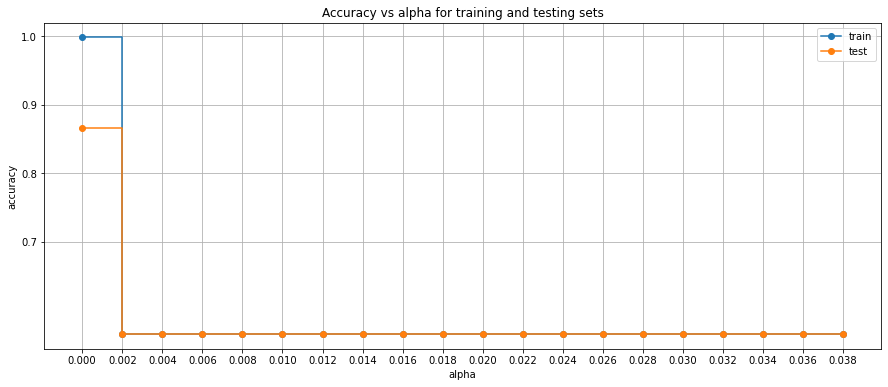

In [28]:
find_alpha(X_train, X_test, y_train, y_test)

In [29]:
# TAking n_estimators = 100 and building model on it

sample_RF_upsampled = RandomForestClassifier(n_estimators=100, random_state=42)

In [30]:
clf_sample = sample_RF_upsampled.fit(X_train, y_train)

In [31]:
y_pred_train = clf_sample.predict(X_train)
y_pred = clf_sample.predict(X_test)

In [32]:
print(classification_report(y_train, y_pred_train ))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9600
           1       1.00      1.00      1.00     12476

    accuracy                           1.00     22076
   macro avg       1.00      1.00      1.00     22076
weighted avg       1.00      1.00      1.00     22076



In [33]:
print(classification_report(y_test, y_pred ))

              precision    recall  f1-score   support

           0       0.91      0.84      0.87      2400
           1       0.88      0.94      0.91      3119

    accuracy                           0.89      5519
   macro avg       0.90      0.89      0.89      5519
weighted avg       0.90      0.89      0.89      5519



In [34]:
cross_val_score(clf_sample, X, y)

array([0.89617684, 0.89835115, 0.89364015, 0.90396811, 0.89907592])

In [35]:
# Building Model with n_estimators=15

from sklearn.ensemble import RandomForestClassifier
sample_RF15_upsampled = RandomForestClassifier(n_estimators=15, random_state=42)

In [36]:
clf_15_sample = sample_RF_upsampled.fit(X_train, y_train)

In [37]:
y_pred_train = clf_15_sample.predict(X_train)
y_pred = clf_15_sample.predict(X_test)

In [38]:
print(classification_report(y_train, y_pred_train ))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9600
           1       1.00      1.00      1.00     12476

    accuracy                           1.00     22076
   macro avg       1.00      1.00      1.00     22076
weighted avg       1.00      1.00      1.00     22076



In [39]:
print(classification_report(y_test, y_pred ))

              precision    recall  f1-score   support

           0       0.91      0.84      0.87      2400
           1       0.88      0.94      0.91      3119

    accuracy                           0.89      5519
   macro avg       0.90      0.89      0.89      5519
weighted avg       0.90      0.89      0.89      5519



In [40]:
cross_val_score(clf_15_sample, X, y)

array([0.89617684, 0.89835115, 0.89364015, 0.90396811, 0.89907592])

In [41]:
y_pred_whole = clf_15_sample.predict(data.drop(['Result'],axis=1))

print(classification_report(data.Result.values, y_pred_whole))

              precision    recall  f1-score   support

           0       0.30      0.08      0.12    260904
           1       0.75      0.94      0.84    780361

    accuracy                           0.72   1041265
   macro avg       0.53      0.51      0.48   1041265
weighted avg       0.64      0.72      0.66   1041265



In [42]:
# Upsampling using sklearn resample

X = sample_data.drop(['Result'],axis=1).values
y = sample_data.Result.values

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=42)
X_train_df = pd.DataFrame(X_train, columns=sample_data.drop(['Result'],axis=1).columns)
y_train_df = pd.DataFrame(y_train, columns=['Result'])

In [44]:
df_train = pd.concat([X_train_df, y_train_df],axis=1)

In [45]:
df_train_majority = df_train.loc[df_train['Result']==1]
df_train_minority = df_train.loc[df_train['Result']==0]

In [46]:
df_train_majority.shape

(12476, 20)

In [47]:
df_train_minority.shape

(4184, 20)

In [48]:
# Checking 80% row counts with respect to majority class

12487*0.80

9989.6

In [49]:
# Performing upsampling on majority class with 80% ratio

df_train_minority_upsampled = resample(df_train_minority , replace=True, n_samples=9990, random_state=42)
after_split_upsampled = pd.concat([df_train_majority, df_train_minority_upsampled])

In [50]:
# Splitting the variables

X_train_upsampled = after_split_upsampled.drop(['Result'],axis=1).values
y_train_upsampled = after_split_upsampled.Result.values

In [51]:
sample_RF15_after_split_upsampled = RandomForestClassifier(n_estimators=15, random_state=42)
sample_RF15_after_split_upsampled = sample_RF15_after_split_upsampled.fit(X_train_upsampled, y_train_upsampled)
y_pred_train = sample_RF15_after_split_upsampled.predict(X_train_upsampled)
y_pred = sample_RF15_after_split_upsampled.predict(X_test)
print(classification_report(y_train_upsampled, y_pred_train ))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9990
           1       1.00      1.00      1.00     12476

    accuracy                           1.00     22466
   macro avg       1.00      1.00      1.00     22466
weighted avg       1.00      1.00      1.00     22466



### Building Model on whole dataset

In [52]:
data_minority = data.loc[data['Result']==0]
data_majority = data.loc[data['Result']==1]
data_minority_upsampled = resample(data_minority, replace=True, n_samples=624290, random_state=42)
data_upsampled = pd.concat([data_majority, data_minority_upsampled ], ignore_index=True)
X = data_upsampled.drop(['Result'],axis=1).values
y = data_upsampled.Result.values

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=30)

In [54]:
model_rf_upsampled = RandomForestClassifier(n_estimators=15, random_state=42)

In [55]:
model_rf_upsampled.fit(X_train, y_train)

RandomForestClassifier(n_estimators=15, random_state=42)

In [56]:
y_pred_train = model_rf_upsampled.predict(X_train)
y_pred_test = model_rf_upsampled.predict(X_test)

#### Printing classification report

In [57]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    499432
           1       0.99      0.99      0.99    624288

    accuracy                           0.99   1123720
   macro avg       0.99      0.99      0.99   1123720
weighted avg       0.99      0.99      0.99   1123720



In [58]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85    124858
           1       0.89      0.87      0.88    156073

    accuracy                           0.87    280931
   macro avg       0.86      0.87      0.86    280931
weighted avg       0.87      0.87      0.87    280931



### Conclusion: As upsampling shows promising effect on dataset we will build model using the same.

In [59]:
model = RandomForestClassifier(n_estimators=15, random_state=42)

model = model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [60]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    499432
           1       0.99      0.99      0.99    624288

    accuracy                           0.99   1123720
   macro avg       0.99      0.99      0.99   1123720
weighted avg       0.99      0.99      0.99   1123720



In [61]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85    124858
           1       0.89      0.87      0.88    156073

    accuracy                           0.87    280931
   macro avg       0.86      0.87      0.86    280931
weighted avg       0.87      0.87      0.87    280931



In [62]:
y_pred_whole = model.predict(sample_data.drop(['Result'],axis=1))

print(classification_report(sample_data.Result.values, y_pred_whole))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88      5230
           1       0.96      0.97      0.96     15595

    accuracy                           0.94     20825
   macro avg       0.93      0.92      0.92     20825
weighted avg       0.94      0.94      0.94     20825



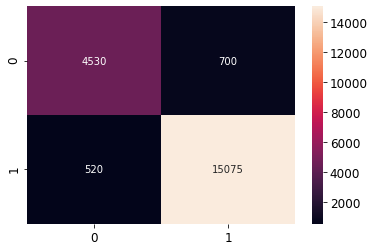

In [63]:
sns.heatmap(confusion_matrix(sample_data.Result.values, y_pred_whole), annot=True, fmt='.8g')
plt.show()

In [64]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1) 
lst_accu_stratified = [] 

X = data.drop(['Result'],axis=1).values
y = data.Result.values
   
for train_index, test_index in skf.split(X, y): 
    X_train_fold, X_test_fold = X[train_index], X[test_index] 
    y_train_fold, y_test_fold = y[train_index], y[test_index] 
    model_rf_upsampled.fit(X_train_fold, y_train_fold)
    lst_accu_stratified.append(f1_score(y_test_fold, model_rf_upsampled.predict(X_test_fold)))

In [65]:
print('List of possible F1 score:', lst_accu_stratified) 
print('\nMaximum F1 score That can be obtained from this model is:', 
      (np.round(max(lst_accu_stratified)*100, 2)))
print('\nMinimum F1 score:', 
      (np.round(min(lst_accu_stratified)*100,2))) 
print('\nOverall F1 score:', 
     (np.round(np.mean(lst_accu_stratified)*100,2)))
print('\nStandard Deviation is:', np.round(np.std(lst_accu_stratified)))

List of possible F1 score: [0.833371237534256, 0.8344495485866327, 0.833782584959738, 0.834011571732236, 0.8334129720013198]

Maximum F1 score That can be obtained from this model is: 83.44

Minimum F1 score: 83.34

Overall F1 score: 83.38

Standard Deviation is: 0.0


## Saving the model built

In [66]:
from joblib import dump, load
dump(model, 'model.joblib')

['model.joblib']